In [16]:
%matplotlib nbagg      
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns
sns.set()

# Solución numérica para la produción de un nucleido

\begin{align}
X & \rightarrow Y (estable) \\
\uparrow & \\
S(t) & \\
\end{align}

Se resuelve la ecuación para la actividad del nucleido $X$:

\begin{equation}
\frac{dA}{dt}(t) = -\lambda A(t) + \lambda S(t)
\end{equation}

utilizando una fuente $S(t)$ cuadrada y periódica en el tiempo

In [17]:
def actividad(y, t, lam, S):
    """ Define el sistema a resolver"""
    dydt = -lam*y + lam*S(t)
    return dydt

## Definición de los parámetros

In [18]:
lam = 0.005      # Constante de decaimiento
Sc = 6.0         # Valor de la fuente
A0 = 0.0         # Actividad inicial
t0 = 0;          # Tiempo inicial
tf = 300;        # Tiempo final
N = 1001;        # Cantidad de puntos para la integración
       
t = np.linspace(t0, tf, N)  # Vector temporal de N puntos entre t0 y tf

## Definición de una fuente periódica y cuadrada

In [19]:
def S1(t, S0, tI, tC):
    """ Define la fuente periódica en el tiempo"""
    # tI : tiempo de irradiación en cada periodo
    # tC : tiempo sin irradiación en cada periodo
    # tP : periodo de la fuente
    tP = tI + tC 
    sig = t % tP < tI
    return S0 * sig

Se construye una fuente que sólo dependa del tiempo S(t):

In [20]:
tI = 10.0           # tiempo de irradiación en cada periodo
tC = 10.0            # tiempo de irradiación en cada periodo
S = lambda t: S1(t, Sc, tI, tC)

## Se resuelve la ecuación diferencial

In [21]:
sol = odeint(actividad, A0, t, args=(lam, S), rtol=1e-10, atol=1e-10)

## Gráficos de los resultados

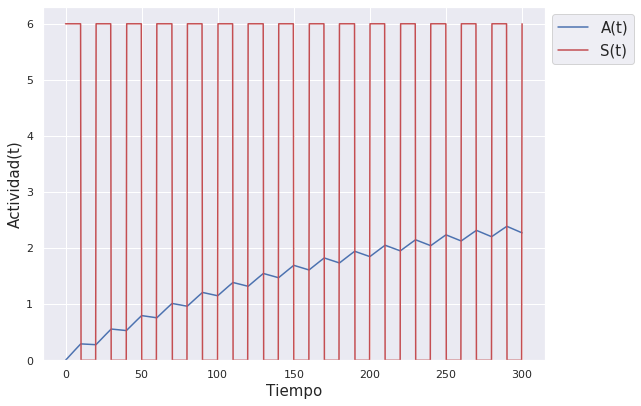

In [26]:
fig, ax = plt.subplots(figsize=(9.0,6.5))

ax.plot(t, sol, 'b', lw=1.5, label='A(t)')
ax.plot(t,S(t),'r',label='S(t)',lw=1.5)

ax.set_xlabel('Tiempo',fontsize=15)
ax.set_ylabel('Actividad(t)',fontsize=15)
ax.grid(True)
ax.set_ylim(0,Sc*1.05)
ax.legend(bbox_to_anchor=(1.0, 1.0),fontsize=15,loc=2);

### Gráfico con controles interactivos 

Permite ajustar de forma interactiva los parámetros $\lambda$, el tiempo de irradiación y el periodo.

Cada vez que se modifican se vuelve a resolver la ecuación diferencial

In [25]:
%matplotlib inline
from ipywidgets import interact, FloatSlider, Layout

#Función que se ejecutará dinámicamente
def intemp(l, tI, tP):
    S = lambda t: S1(t, Sc, tI, tP-tI)

    sol = odeint(actividad, A0, t, args=(l, S), rtol=1e-14, atol=1e-13)
                 
    fig, ax = plt.subplots(figsize=(15.0, 7.5))

    ax.plot(t, sol, 'b', label='A(t)', lw=2.5)
    ax.plot(t, S(t), 'r', label='S(t)')

    ax.set_xlabel('Tiempo', fontsize=20)
    ax.set_ylabel('Actividad(t)', fontsize=20)
    ax.grid(True)
    ax.set_ylim(0, Sc*1.05)
    ax.legend(bbox_to_anchor=(1.01, 1.0), fontsize=20, loc=2)

# Definición de los controles
lam_widget = FloatSlider(min=0.001, max=0.7, step=0.002, value=0.06, continuous_update=False,
                         description='$\lambda$', layout=Layout(width='50%', height='50px'))
tI_widget = FloatSlider(min=0.0, max=10.0, step=1.0, value=5.0, continuous_update=False,
                        description='t irradiación', layout=Layout(width='50%', height='50px'))
tP_widget = FloatSlider(min=5.0, max=20.0, step=1.0, value=10.0, continuous_update=False,
                        description='Periodo', layout=Layout(width='50%', height='50px'))
    
# tP es el valor máximo de tI
def update_tI_range(*args):
    tI_widget.max = tP_widget.value   
tI_widget.observe(update_tI_range, 'value')
# tI es el valor mínimo de tP
def update_tP_range(*args):
    tP_widget.min = tI_widget.value
tP_widget.observe(update_tP_range, 'value')
    
interact(intemp, l=lam_widget, tI=tI_widget, tP=tP_widget);

interactive(children=(FloatSlider(value=0.06, continuous_update=False, description='$\\lambda$', layout=Layout…